In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
#import maup
from zipfile import ZipFile
import numpy as np
import os
import shutil

# State House Special Election

In [7]:
pwd

'/Users/lilyfalk/sandbox/pdv-va'

In [8]:
final = gpd.read_file('./vest_va/va_2018_statehouse_special/va_2018_statehouse_special.shp')
print(final.shape)

(79, 9)


## Election results

### District 8

State House Special elections took place in 2018 in Districts 8 and 24. Here we load in solely these two districts where the elections took place.

In [9]:
df8 = pd.read_csv('./vest_va/Virginia_Elections_Database__2018_House_of_Delegates_General_Election_District_8_including_precincts.csv')
df8.head()

,County/City,Ward,Pct,Joseph P. McNamara,"Edward Carter Turner, III",All Others,Total Votes Cast
0,NaN,NaN,NaN,Republican,Democratic,NaN,NaN
1,Craig County,-,101 - Court House,300,80,1.0,381
2,Craig County,-,201 - Ammendale Precinct,402,90,0.0,492
3,Craig County,-,301 - Givens & Reynolds Store,188,92,0.0,280
4,Craig County,-,303 - Marshalls Store,160,77,0.0,237


In [10]:
print('district 8 number of county/city ids before modifications: ', df8['County/City'].nunique())
print('district 8 df shape: ', df8.shape)

#Remove first row from df where it is NaN values and replace column headers to match VEST's formatting
df8 = df8.iloc[1:]
df8 = df8.drop(['Ward'], axis = 1)
df8['HOD_DIST'] = '8'

df8['LOCALITY'] = df8['County/City']
df8['S18HODREP'] = df8['Joseph P. McNamara']
df8['S18HODDEM'] = df8['Edward Carter Turner, III']
df8['S18HODWRI'] = df8['All Others']
df8 = df8.drop(['County/City', 'Joseph P. McNamara', 'Edward Carter Turner, III', 'All Others'], axis = 1)

print('district 8 number of county/city ids after modifications: ', df8['LOCALITY'].nunique())
df8.head()

district 8 number of county/city ids before modifications:  5
district 8 df shape:  (46, 7)
district 8 number of county/city ids after modifications:  5


,Pct,Total Votes Cast,HOD_DIST,LOCALITY,S18HODREP,S18HODDEM,S18HODWRI
1,101 - Court House,381,8,Craig County,300,80,1.0
2,201 - Ammendale Precinct,492,8,Craig County,402,90,0.0
3,301 - Givens & Reynolds Store,280,8,Craig County,188,92,0.0
4,303 - Marshalls Store,237,8,Craig County,160,77,0.0
5,401 - Barbours Creek,198,8,Craig County,149,49,0.0


In [11]:
# District 8 County manipulations
county_dict = pd.Series(final['COUNTYFP'].values, index = final['LOCALITY']).to_dict()
print('dict: ',county_dict)
print('value counts, notice totals: ', df8['LOCALITY'].value_counts())
#Use county dict to get county fips code from county name
df8['COUNTYFP'] = df8['LOCALITY'].map(county_dict)
#See that totals did not map, so 4 instead of 5 unique county fips
print('district 8 number of county fips codes: ', df8.COUNTYFP.nunique())

dict:  {'Amherst County': '009', 'Augusta County': '015', 'Bath County': '017', 'Rockbridge County': '163', 'Buena Vista City': '530', 'Lexington City': '678', 'Craig County': '045', 'Montgomery County': '121', 'Roanoke County': '161', 'Salem City': '775'}
value counts, notice totals:  Roanoke County       15
Salem City           12
Craig County          9
Montgomery County     8
TOTALS                1
Name: LOCALITY, dtype: int64
district 8 number of county fips codes:  4


In [12]:
# Change types for votes to int to enable total checks
df8['S18HODREP'] = df8['S18HODREP'].map(lambda x: str(x).replace(',', ''))
df8['S18HODDEM'] = df8['S18HODDEM'].map(lambda x: str(x).replace(',', '')) 
df8['S18HODWRI'] = df8['S18HODWRI'].map(lambda x: str(x).replace(',', ''))

df8['S18HODREP'] = df8['S18HODREP'].astype(str).astype(float).astype(int)
df8['S18HODDEM'] = df8['S18HODDEM'].astype(str).astype(float).astype(int)
df8['S18HODWRI'] = df8['S18HODWRI'].astype(str).astype(float).astype(int)

#Check groupby to compare totals below:
df8.groupby(['COUNTYFP']).sum()

,S18HODREP,S18HODDEM,S18HODWRI
COUNTYFP,,,
045,1666,519,1
121,3706,2955,16
161,10487,5912,23
775,5942,3906,10


### District 24

In [13]:
df24 = pd.read_csv('./vest_va/Virginia_Elections_Database__2018_House_of_Delegates_Special_General_Election_District_24_including_precincts.csv')
df24.head()

,County/City,Ward,Pct,Ronnie Ray Campbell,Christian Renau Worth,All Others,Total Votes Cast
0,NaN,NaN,NaN,Republican,Democratic,NaN,NaN
1,Amherst County,-,102 - New Glasgow,164,114,2.0,280
2,Amherst County,-,103 - Coolwell,82,20,1.0,103
3,Amherst County,-,201 - Court House,397,261,13.0,671
4,Amherst County,-,202 - Temperance,137,59,3.0,199


In [14]:
print('district 24 number of county/city ids before modifications: ', df24['County/City'].nunique())
print('district 24 df shape: ', df24.shape)

#Remove first row from df where it is NaN values and replace column headers to match VEST's formatting
df24 = df24.iloc[1:]
df24 = df24.drop(['Ward'], axis = 1)
df24['HOD_DIST'] = '24'

df24['LOCALITY'] = df24['County/City']
df24['S18HODREP'] = df24['Ronnie Ray Campbell']
df24['S18HODDEM'] = df24['Christian Renau Worth']
df24['S18HODWRI'] = df24['All Others']
df24 = df24.drop(['County/City', 'Ronnie Ray Campbell', 'Christian Renau Worth', 'All Others'], axis = 1)

print('district 24 number of county/city ids after modifications: ', df24['LOCALITY'].nunique())

#District 24 County manipulations, use same dict as for district 24:
df24['COUNTYFP'] = df24['LOCALITY'].map(county_dict)
#See that totals row did not map, so 6 instead of 7 unique county fips:
print('district 24 number of county fips codes: ', df24.COUNTYFP.nunique())
print('county fips value counts: ', df24['COUNTYFP'].value_counts())

#Change vote type to int from str:
df24['S18HODREP'] = df24['S18HODREP'].map(lambda x: str(x).replace(',', ''))
df24['S18HODDEM'] = df24['S18HODDEM'].map(lambda x: str(x).replace(',', '')) 
df24['S18HODWRI'] = df24['S18HODWRI'].map(lambda x: str(x).replace(',', ''))
df24['S18HODREP'] = df24['S18HODREP'].astype(str).astype(float).astype(int)
df24['S18HODDEM'] = df24['S18HODDEM'].astype(str).astype(float).astype(int)
df24['S18HODWRI'] = df24['S18HODWRI'].astype(str).astype(float).astype(int)
#See groupby in prep for below comparison:
df24.groupby(['COUNTYFP']).sum()

district 24 number of county/city ids before modifications:  7
district 24 df shape:  (55, 7)
district 24 number of county/city ids after modifications:  7
district 24 number of county fips codes:  6
county fips value counts:  163    19
009    11
017     9
015     8
530     3
678     3
Name: COUNTYFP, dtype: int64


,S18HODREP,S18HODDEM,S18HODWRI
COUNTYFP,,,
009,1659,844,45
015,1369,465,1
017,360,227,0
163,2560,1861,17
530,385,236,0
678,287,853,4


### Districts 24 and 8 together

Merge districts into one dataframe now that each is processed to compare with VEST's file.

In [15]:
elections = []
elections.append(df24)
elections.append(df8)

df = pd.concat(elections, axis = 0)
df = df[df['LOCALITY'] != 'TOTALS']
df = df.reset_index()
df = df.fillna(0)

## Check Column & County totals

In [16]:
column_list = ['S18HODREP', 'S18HODDEM', 'S18HODWRI']

for val in column_list:
    vote_dif = df[val].sum()-final[val].sum()
    if (vote_dif == 0):
        print(val+": EQUAL")
    else:
        print(val+": DIFFERENCE OF " + str(vote_dif)+ " VOTES")

S18HODREP: EQUAL
S18HODDEM: EQUAL
S18HODWRI: EQUAL


In [17]:
print("Counties with differences printed below:")
diff_counties=[]
for i in column_list:
    diff = df.groupby(["COUNTYFP"]).sum()[i]-final.groupby(["COUNTYFP"]).sum()[i]
    for val in diff[diff != 0].index.values.tolist():
        if val not in diff_counties:
            diff_counties.append(val)
    if len(diff[diff != 0]!=0):
        print(i)
        print(diff[diff != 0].to_string(header=False))
print("")
print("All other races in all counties are equal")

Counties with differences printed below:

All other races in all counties are equal


## Reallocate absentee votes

In [18]:
#Create df that are groupbys based on needed categories for comparison - with and without absentee
absentee_and_prov = df[(df['Pct'].map(lambda x: 'Absentee' in str(x))) | (df['Pct'].map(lambda x: 'Provisional' in str(x)))]
groupby_absentee_and_prov_tot = absentee_and_prov.groupby(['COUNTYFP']).sum()

groupby_county_df_tot = df.groupby(['COUNTYFP']).sum()
df_no_absent_or_provisional = df[(df['Pct'].map(lambda x: 'Absentee' not in str(x))) & (df['Pct'].map(lambda x: 'Provisional' not in str(x)))
                                & (df['LOCALITY'] != 'TOTALS')]
groupby_county_tot_no_absentee = df_no_absent_or_provisional.groupby('COUNTYFP').sum()

#Copy dfs to set up for reallocation to create new df
df_with_absentee_reallocated = df_no_absent_or_provisional.copy()
groupby_absentee_and_prov_tot.reset_index(inplace=True,drop=False)
groupby_county_tot_no_absentee.reset_index(inplace=True,drop=False)

to_dole_out_totals = groupby_absentee_and_prov_tot.copy()
precinct_specific_totals = groupby_county_tot_no_absentee.copy()

column_list = ['S18HODREP', 'S18HODDEM', 'S18HODWRI']

#Reallocation:

#Create some new columns for each of these races to deal with the allocation
for race in column_list:
    add_var = race+"_add"
    rem_var = race+"_rem"
    floor_var = race+"_floor"
    df_with_absentee_reallocated.loc[:,add_var]=0.0
    df_with_absentee_reallocated.loc[:,rem_var]=0.0
    df_with_absentee_reallocated.loc[:,floor_var]=0.0

#Iterate over the rows
#Note this function iterates over the dataframe two times so the rounded vote totals match the totals to allocate
for index, row in df_no_absent_or_provisional.iterrows():
    for race in column_list:
        add_var = race+"_add"
        rem_var = race+"_rem"
        floor_var = race+"_floor"
        #Grab the district
        county_id = row['COUNTYFP']
        #Get the denominator for the allocation (the precinct vote totals)
        denom = precinct_specific_totals.loc[precinct_specific_totals['COUNTYFP']==county_id][race]
        #Get one of the numerators, how many districtwide votes to allocate
        numer = to_dole_out_totals.loc[to_dole_out_totals['COUNTYFP']==county_id][race]
        #Get the vote totals for this race in this precinct
        val = df_with_absentee_reallocated.at[index,race]
        #Get the vote share, the precincts % of total precinct votes in the district times votes to allocate
        if ((float(denom)==0)):
            vote_share = 0
        else:
            vote_share = (float(val)/float(denom))*float(numer)
        df_with_absentee_reallocated.at[index,add_var] = vote_share
        #Take the decimal remainder of the allocation
        df_with_absentee_reallocated.at[index,rem_var] = vote_share%1
        #Take the floor of the allocation
        df_with_absentee_reallocated.at[index,floor_var] = np.floor(vote_share)

#After the first pass through, get the sums of the races by district to assist in the rounding            
first_allocation = pd.DataFrame(df_with_absentee_reallocated.groupby(['COUNTYFP']).sum())

#Now we want to iterate district by district to work on rounding
county_list = list(to_dole_out_totals['COUNTYFP'].unique()) 

#Iterate over the district
for county in county_list:
    for race in column_list:
        add_var = race+"_add"
        rem_var = race+"_rem"
        floor_var = race+"_floor"
        #County how many votes still need to be allocated (because we took the floor of all the initial allocations)
        to_go = int(np.round((int(to_dole_out_totals.loc[to_dole_out_totals['COUNTYFP']==county][race])-first_allocation.loc[first_allocation.index==county,floor_var])))
        #Grab the n precincts with the highest remainders and round these up, where n is the # of votes that still need to be allocated
        for index in df_with_absentee_reallocated.loc[df_with_absentee_reallocated['COUNTYFP']==county][rem_var].nlargest(to_go).index:
            df_with_absentee_reallocated.at[index,add_var] = np.ceil(df_with_absentee_reallocated.at[index,add_var])

#Iterate over every race again
for race in column_list:
    add_var = race+"_add"
    #Round every allocation down to not add fractional votes
    df_with_absentee_reallocated.loc[:,add_var]=np.floor(df_with_absentee_reallocated.loc[:,add_var])
    df_with_absentee_reallocated.loc[:,race]+=df_with_absentee_reallocated.loc[:,add_var]

## Check Totals after Vote Allocation

In [19]:
for val in column_list:
    vote_dif = df_with_absentee_reallocated[val].sum()-final[val].sum()
    if (vote_dif == 0):
        print(val+": EQUAL")
    else:
        print(val+": DIFFERENCE OF " + str(vote_dif)+ " VOTES")

S18HODREP: EQUAL
S18HODDEM: EQUAL
S18HODWRI: EQUAL


In [20]:
print("Counties with differences printed below:")
diff_counties=[]
for i in column_list:
    diff = df_with_absentee_reallocated.groupby(["COUNTYFP"]).sum()[i]-final.groupby(["COUNTYFP"]).sum()[i]
    for val in diff[diff != 0].index.values.tolist():
        if val not in diff_counties:
            diff_counties.append(val)
    if len(diff[diff != 0]!=0):
        print(i)
        print(diff[diff != 0].to_string(header=False))
print("")
print("All other races in all counties are equal")

Counties with differences printed below:

All other races in all counties are equal


### Create unique ID to enable merge

In [21]:
#Notice the '-' creating discrepency
set(df_with_absentee_reallocated.COUNTYFP + df_with_absentee_reallocated.Pct.str.slice(stop = 3)) - set(final.COUNTYFP + final.VTDST.str.slice(start = 3))

{'5301 -',
 '5302 -',
 '6781 -',
 '7751 -',
 '77510 ',
 '7752 -',
 '7753 -',
 '7754 -',
 '7755 -',
 '7756 -',
 '7757 -',
 '7758 -',
 '7759 -'}

In [22]:
#Function that creates the necessary consistency:
def vtdst_changer(vtdst):
    if (vtdst[1:3] == ' -'):
        two_lead_zero = '00' + vtdst[:1]
        return two_lead_zero
    elif (vtdst[1:3] == '- '):
        two_lead_zero = '00' + vtdst[:1]
        return two_lead_zero
    elif (vtdst[-1:] == ' '):
        one_lead_zero = '0' + vtdst[:2]
        return one_lead_zero
    elif (vtdst[-1:] == '-'):
        one_lead_zero = '0' + vtdst[:2]
        return one_lead_zero
    else:
        return vtdst

#Apply the above function to the df
df_with_absentee_reallocated['vtdst'] = df_with_absentee_reallocated.Pct.str.slice(stop = 3)
df_with_absentee_reallocated['vtdst'] = df_with_absentee_reallocated['vtdst'].apply(vtdst_changer)
#Create unique id
df_with_absentee_reallocated['unique_id'] = df_with_absentee_reallocated.COUNTYFP + df_with_absentee_reallocated.vtdst
df_with_absentee_reallocated.head()

,index,Pct,Total Votes Cast,HOD_DIST,LOCALITY,S18HODREP,S18HODDEM,S18HODWRI,COUNTYFP,S18HODREP_add,S18HODREP_rem,S18HODREP_floor,S18HODDEM_add,S18HODDEM_rem,S18HODDEM_floor,S18HODWRI_add,S18HODWRI_rem,S18HODWRI_floor,vtdst,unique_id
0,1,102 - New Glasgow,280,24,Amherst County,168.0,118.0,2.0,009,4.0,0.155748,4.0,4.0,0.623472,3.0,0.0,0.045455,0.0,102,009102
1,2,103 - Coolwell,103,24,Amherst County,84.0,21.0,1.0,009,2.0,0.077874,2.0,1.0,0.635697,0.0,0.0,0.022727,0.0,103,009103
2,3,201 - Court House,671,24,Amherst County,407.0,269.0,14.0,009,10.0,0.059951,10.0,8.0,0.295844,8.0,1.0,0.295455,0.0,201,009201
3,4,202 - Temperance,199,24,Amherst County,140.0,61.0,3.0,009,3.0,0.471570,3.0,2.0,0.875306,1.0,0.0,0.068182,0.0,202,009202
4,5,301 - Monroe,230,24,Amherst County,163.0,68.0,5.0,009,4.0,0.029048,4.0,2.0,0.097800,2.0,0.0,0.113636,0.0,301,009301


In [23]:
#Create matching unique id in final file
final['unique_id'] = final.COUNTYFP + final.VTDST.str.slice(start = 3)
print('values in df unique id not in vest file unique id column: ', set(df_with_absentee_reallocated.unique_id) - set(final.unique_id))
print('values in vest file unique id not in df unique id column: ', set(final.unique_id) - set(df_with_absentee_reallocated.unique_id))

values in df unique id not in vest file unique id column:  set()
values in vest file unique id not in df unique id column:  set()


# Shapefile

In [24]:
pwd

'/Users/lilyfalk/sandbox/pdv-va'

In [56]:
#Load in shapefiles from the census at precinct level
proj = final.crs
county_fips = []
for directory in os.listdir('./vest_va/census_shps_by_county_all_unzip/'):
    if not directory[0] == '.':
        county_fips.append(directory[-5:])

county_vtds = []

for i in county_fips: #i dont have fips_codes file
    ref = './vest_va/census_shps_by_county_all_unzip/partnership_shapefiles_19v2_'
    vtd_ref = ref + i + '/PVS_19_v2_vtd_' + i + '.shp' 
    vtd_shp = gpd.read_file(vtd_ref)
    #print(i, ' added to list')
    county_vtds.append(vtd_shp)


global shp_vtd
shp_vtd = gpd.GeoDataFrame(pd.concat(county_vtds, axis = 0) , crs = proj) 

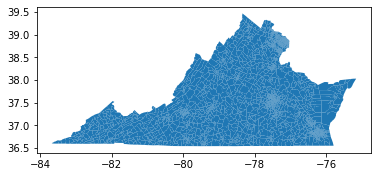

In [68]:
shp_vtd.plot()

In [57]:
#Load in shapefiles from the census at district level
county_sldl = []

for i in county_fips: #i dont have fips_codes file
    ref = './vest_va/census_shps_by_county_all_unzip/partnership_shapefiles_19v2_'
    sldl_ref = ref + i + '/PVS_19_v2_sldl_' + i + '.shp' #PVS_19_v2_sldl_51650
    sldl_shp = gpd.read_file(sldl_ref)
    #print(i, ' added to list')
    county_sldl.append(sldl_shp)
    
global shp_sldl
shp_sldl = gpd.GeoDataFrame(pd.concat(county_sldl, axis = 0) , crs = proj) 

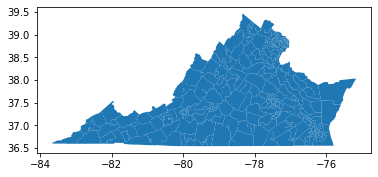

In [67]:
shp_sldl.plot()

precinct and district shapefile, only districts 8 and 24, and VEST final shapefile for comparison 


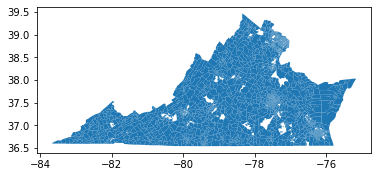

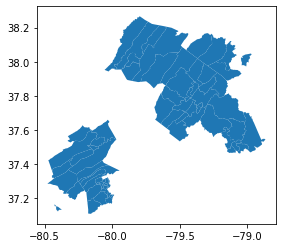

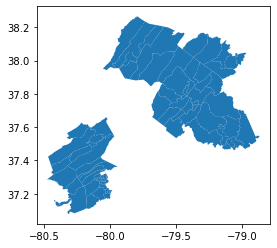

In [70]:
#Combine the precinct and district shapefiles into one:
overlay = gpd.overlay(shp_sldl, shp_vtd, how='intersection', make_valid=False, keep_geom_type=True)
print('precinct and district shapefile, only districts 8 and 24, and VEST final shapefile for comparison ')
overlay.plot()
shp = overlay[(overlay.SLDLST == '008') | (overlay.SLDLST == '024')]
shp.plot()
final.plot()

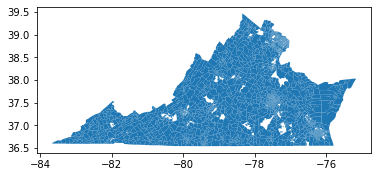

In [69]:
overlay.plot()

In [60]:
print('unique id in shapefile not in vest final file: ', set(shp.COUNTYFP_1 + shp.VTDST.str.slice(start = 3)) - set(final.COUNTYFP + final.VTDST.str.slice(start = 3)))
print('unique id in vest file not in shapefile: ', set(final.COUNTYFP + final.VTDST.str.slice(start = 3)) - set(shp.COUNTYFP_1 + shp.VTDST.str.slice(start = 3)))
#Assign unique id to column in shapefile
shp['unique_id'] = shp['COUNTYFP_1'] + shp['VTDST'].str.slice(start = 3)

unique id in shapefile not in vest final file:  set()
unique id in vest file not in shapefile:  {'015504', '009302', '121304', '121301', '121701'}


/Users/lilyfalk/anaconda3/lib/python3.8/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


## Join election results and shapefile

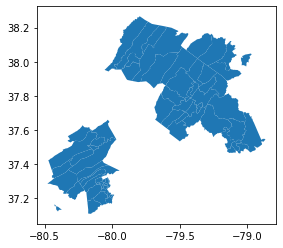

In [61]:
join = gpd.GeoDataFrame(pd.merge(df_with_absentee_reallocated, shp, on = 'unique_id', how = 'outer'), crs = proj)
join.plot()

### Refining shp match

In [62]:
shp_id_list = list(set(shp['unique_id']) - set(df_with_absentee_reallocated['unique_id']))
df_id_list = list(set(df_with_absentee_reallocated['unique_id']) - set(shp['unique_id']))

print(shp.shape[0])
print(len(shp_id_list))
print(df_with_absentee_reallocated.shape[0])
print(len(df_id_list))

print(set(final.unique_id) - set(df_with_absentee_reallocated.unique_id))

74
0
79
5
set()


# Validation

## Validating Shapfile

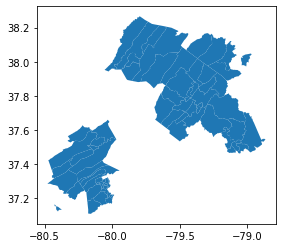

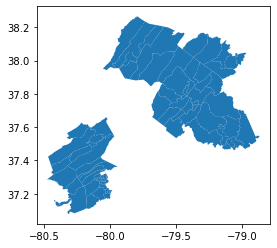

In [63]:
shp.plot()
final.plot()

In [71]:
shp_final_merge = pd.merge(join, final, on = 'unique_id', how = 'outer', suffixes = ['_x', '_y'],indicator=True)

both = shp_final_merge[shp_final_merge["_merge"]=="both"]
source_geoms = gpd.GeoDataFrame(both,geometry="geometry_x",crs=proj)
vest_geoms = gpd.GeoDataFrame(both,geometry="geometry_y",crs=proj)
source_geoms = source_geoms.to_crs(3857)
vest_geoms = vest_geoms.to_crs(3857)
source_geoms["geometry_x"]=source_geoms.buffer(0)
vest_geoms["geometry_y"]=vest_geoms.buffer(0)
vals = source_geoms.geom_almost_equals(vest_geoms,decimal=0)
print(vals.value_counts())

AttributeError: 'NoneType' object has no attribute 'is_empty'

In [65]:
count = 0
area_list = []
big_diff = pd.DataFrame(columns=["area"])
for i in range(0,len(source_geoms)):
    diff = source_geoms.iloc[[i]].symmetric_difference(vest_geoms.iloc[[i]])
    intersection = source_geoms.iloc[[i]].intersection(vest_geoms.iloc[[i]])
    area = float(diff.area/10e6)
    area_list.append(area)
    #print("Area is " + str(area))

    if (area > 1):
        count += 1
        name = source_geoms.at[i,"Pct"]
        big_diff.loc[name]=area
        print(str(count)+") For " + name + " difference in area is " + str(area))
        if (intersection.iloc[0].is_empty):
            base = diff.plot(color="red")
            source_geoms.iloc[[i]].plot(color="orange",ax=base)
            vest_geoms.iloc[[i]].plot(color="blue",ax=base)
            base.set_title(name)
        else:
            base = diff.plot(color="red")
            source_geoms.iloc[[i]].plot(color="orange",ax=base)
            vest_geoms.iloc[[i]].plot(color="blue",ax=base)
            intersection.plot(color="green",ax=base)
            base.set_title(name)

<ipython-input-65-787353f6cb91>:7: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  area = float(diff.area/10e6)


In [72]:
print(gpd.__version__)

0.8.1


In [66]:
df = pd.DataFrame(area_list)
print(df.shape)

print(str(len(df[df[0]==0]))+" precincts w/ a difference of 0 km^2")
print(str(len(df[(df[0]<.1) & (df[0]>0)]))+ " precincts w/ a difference between 0 and .1 km^2")
print(str(len(df[(df[0]<.5) & (df[0]>=.1)]))+ " precincts w/ a difference between .1 and .5 km^2")
print(str(len(df[(df[0]<1) & (df[0]>=.5)]))+ " precincts w/ a difference between .5 and 1 km^2")
print(str(len(df[(df[0]<2) & (df[0]>=1)]))+ " precincts w/ a difference between 1 and 2 km^2")
print(str(len(df[(df[0]<5) & (df[0]>=2)]))+ " precincts w/ a difference between 2 and 5 km^2")
print(str(len(df[(df[0]>=5)]))+ " precincts w/ a difference greater than 5 km^2")

(79, 1)
57 precincts w/ a difference of 0 km^2
17 precincts w/ a difference between 0 and .1 km^2
0 precincts w/ a difference between .1 and .5 km^2
0 precincts w/ a difference between .5 and 1 km^2
0 precincts w/ a difference between 1 and 2 km^2
0 precincts w/ a difference between 2 and 5 km^2
0 precincts w/ a difference greater than 5 km^2


### County 121 ex

(6, 72)


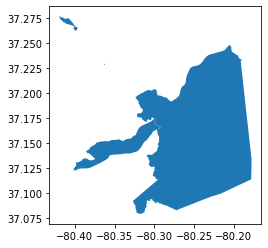

In [49]:
print(shp_final_merge[shp_final_merge['unique_id'].str[0:3] == '121'].shape)
ex_x = gpd.GeoDataFrame(shp_final_merge[shp_final_merge['unique_id'].str[0:3]== '121'], geometry = 'geometry_x', crs = proj)
ex_y = gpd.GeoDataFrame(shp_final_merge[shp_final_merge['unique_id'].str[0:3]== '121'], geometry = 'geometry_y', crs = proj)

gpd.overlay(ex_x, ex_y, how = 'symmetric_difference').plot()

## Validating election results

In [50]:
print(df_with_absentee_reallocated["unique_id"].value_counts())
print(final["unique_id"].value_counts())
print(df_with_absentee_reallocated.shape)
print(final.shape)
print(final[~(final["unique_id"].isin(list(df_with_absentee_reallocated["unique_id"])))])

530002    1
045201    1
161107    1
015502    1
530001    1
         ..
161103    1
163201    1
163402    1
163102    1
163502    1
Name: unique_id, Length: 79, dtype: int64
530002    1
045501    1
121303    1
161107    1
015502    1
         ..
161103    1
163201    1
163402    1
163102    1
163502    1
Name: unique_id, Length: 79, dtype: int64
(79, 20)
(79, 10)
Empty GeoDataFrame
Columns: [COUNTYFP, LOCALITY, VTDST, PRECINCT, HOD_DIST, S18HODDEM, S18HODREP, S18HODWRI, geometry, unique_id]
Index: []


In [51]:
final_df_merge = pd.merge(join, final, on = 'unique_id', how = 'outer', suffixes = ['_x', '_y'])

In [52]:
final.columns

Index(['COUNTYFP', 'LOCALITY', 'VTDST', 'PRECINCT', 'HOD_DIST', 'S18HODDEM',
       'S18HODREP', 'S18HODWRI', 'geometry', 'unique_id'],
      dtype='object')

In [53]:
column_list = ['S18HODDEM', 'S18HODREP', 'S18HODWRI']

In [54]:
def validater_row (df, column_List):
    matching_rows = 0
    different_rows = 0
    diff_list=[]
    diff_values = []
    max_diff = 0
    for j in range(0,len(df.index)):
        same = True
        for i in column_List:
            left_Data = i + "_x"
            right_Data = i + "_y"
            diff = abs(df.iloc[j][left_Data]-df.iloc[j][right_Data])
            if(diff >0):
                if(diff>0):
                    print(i, "{:.>72}".format(df.iloc[j]["Pct"]), "(V)","{:.>5}".format(int(df.iloc[j][right_Data]))," (S){:.>5}".format(int(df.iloc[j][left_Data])),"(D):{:>5}".format(int(df.iloc[j][right_Data])-int(df.iloc[j][left_Data])))           
                #print(df.iloc[j]['countypct'])
                
                diff_values.append(abs(diff))
                same = False
                if(np.isnan(diff)):
                    print("NaN value at diff is: ", df.iloc[j]["Pct"])
                    print(df.iloc[j][left_Data])
                    print(df.iloc[j][right_Data])
                if (diff>max_diff):
                    max_diff = diff
                    #print("New max diff is: ", str(max_diff))
                    #print(df.iloc[j]['cty_pct'])
        if(same != True):
            different_rows +=1
            diff_list.append(df.iloc[j]["Pct"])
        else:
            matching_rows +=1
    print("")
    print("There are ", len(df.index)," total rows")
    print(different_rows," of these rows have election result differences")
    print(matching_rows," of these rows are the same")
    print("")
    print("The max difference between any one shared column in a row is: ", max_diff)
    if(len(diff_values)!=0):
        print("The average difference is: ", str(sum(diff_values)/len(diff_values)))
    count_big_diff = len([i for i in diff_values if i > 10])
    print("There are ", str(count_big_diff), "precinct results with a difference greater than 10")
    diff_list.sort()
    print(diff_list)

In [55]:
validater_row(final_df_merge, column_list)

S18HODDEM .......................................................102 - New Glasgow (V) ..117  (S)..118 (D):   -1
S18HODDEM .......................................................201 - Court House (V) ..270  (S)..269 (D):    1
S18HODREP .......................................................201 - Court House (V) ..408  (S)..407 (D):    1
S18HODREP .....................................................303 - Pleasant View (V) ..101  (S)..102 (D):   -1
S18HODREP ........................................................504 - White Hill (V) ..190  (S)..191 (D):   -1
S18HODREP .........................................................602 - Ridgeview (V) ..443  (S)..442 (D):    1
S18HODDEM ....................................................202 - Highland Belle (V) ..297  (S)..296 (D):    1
S18HODDEM ........................................................502 - Meadowview (V) ..140  (S)..141 (D):   -1
S18HODREP ......................................................101 - Precinct A-1 (V) ..578  (S